In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

import umap

In [2]:
def col_types(df, column):
    '''Check the column names of a dataframe'''
    return set([type(i) for i in df[column].values])

def plot_umap(d, figname):
    '''Plot UMAP for a given dataset'''
    
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(d)

    plt.scatter(
        embedding[:, 0],
        embedding[:, 1]
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'UMAP projection of the {figname} dataset', fontsize=24)
    
    if figname:
        plt.savefig(f'umap_{figname}.png')
    
    return embedding

In [3]:
# Name the columns and load the csv file
cols = [f'x{str(n).zfill(4)}' for n in range(1742)]

# Anti-freeze protein. Set afp label to 1=True.
afp = pd.read_csv("data/anti-freeze-protein-classification/AFP11.csv", names=cols)
afp.x0001 = 1

# Non-anti-freeze protein. 
non_afp = pd.read_csv('data/anti-freeze-protein-classification/Non-AFP11.csv', 
                      names=cols, dtype={cols[0]: str})

# Concatenate the dataframes
data = pd.concat([afp, non_afp], ignore_index=True)
print(f'Number of classes:   {data.x0001.unique()}')
print(f'Is each row unique?: {len(data.x0000.unique()) == len(data.x0000)}')

# Extract data columns. Convert to z-scores.
raw_data = data[cols[2:]].values
scaled_data = StandardScaler().fit_transform(raw_data)

# Extract/scale Amino Acit Composition
aac = data[cols[2:22]].values
scaled_aac = StandardScaler().fit_transform(aac)

# Extract/scale Protein Descriptors
dpc = data[cols[23:]].values
scaled_dpc = StandardScaler().fit_transform(dpc)

Number of classes:   [1 0]
Is each row unique?: True


array([[ 4.5542665 , -2.8226442 ],
       [ 2.1450357 , -0.980547  ],
       [ 1.7426611 , -1.486427  ],
       ...,
       [ 0.02122093, -3.5686154 ],
       [-0.31063688, -2.2063792 ],
       [ 0.18984634, -2.3868175 ]], dtype=float32)

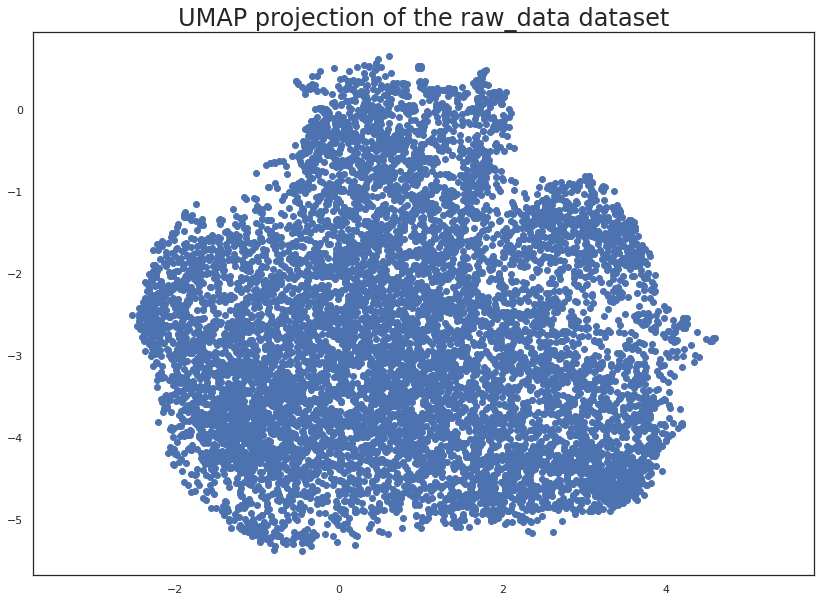

In [4]:
plot_umap(raw_data, 'raw_data')

array([[8.246508  , 4.9779105 ],
       [7.4451146 , 3.0080752 ],
       [3.4871836 , 2.2573342 ],
       ...,
       [5.0330276 , 1.1568633 ],
       [4.8249846 , 0.99816036],
       [5.2145696 , 1.4590664 ]], dtype=float32)

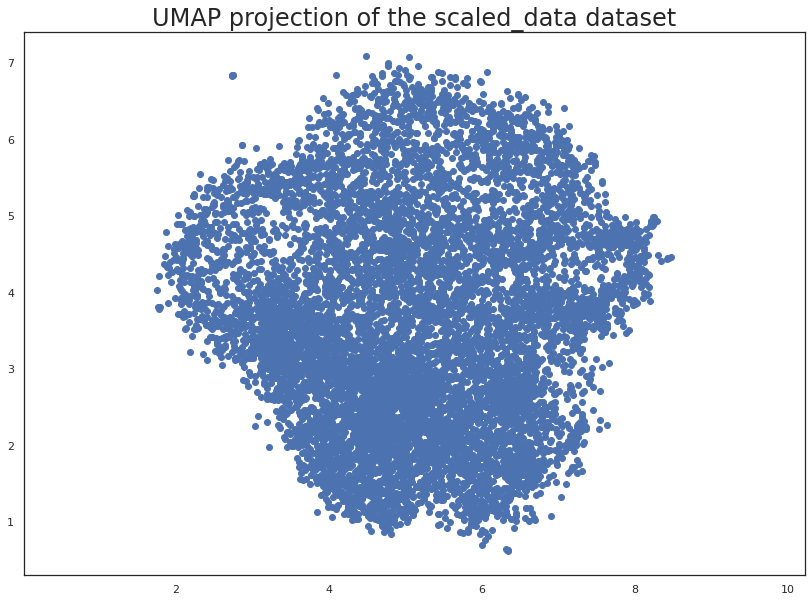

In [5]:
plot_umap(scaled_data, 'scaled_data')

array([[5.5187697 , 4.9478436 ],
       [4.8379035 , 4.936284  ],
       [3.9660783 , 3.3792899 ],
       ...,
       [6.7993193 , 0.82228684],
       [7.373889  , 0.32682228],
       [6.199521  , 0.8150308 ]], dtype=float32)

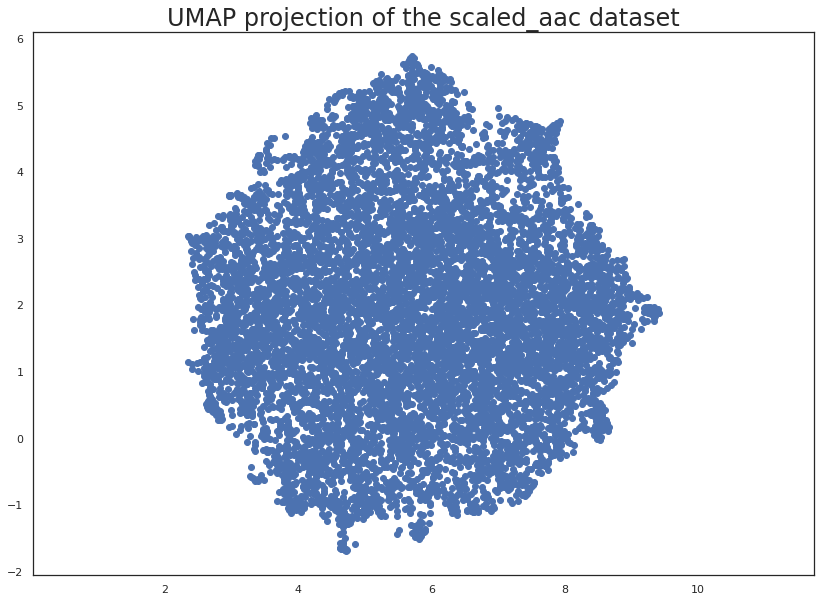

In [6]:
plot_umap(scaled_aac, 'scaled_aac')

In [7]:
plot_umap(scaled_dpc, 'scaled_dpc')

KeyboardInterrupt: 